In [1]:
import pickle
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='GunPoint'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
print(train_x.shape)
print(test_x.shape)

(50, 150, 1)
(150, 150, 1)


In [5]:
train_x.shape

(50, 150, 1)

In [6]:
train_y.shape

(50,)

# Load Model

In [7]:
model= pickle.load(open(f'../../ClassificationModels/models/GunPoint/GunPoint_SVM.sav','rb')).fit(train_x,train_y)
#/media/jacqueline/Data/InterpretabiltyTimeSeries/ClassificationModels/models/GunPoint/GunPoint_SVM.sav

# Explanation Algo

In [8]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [9]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST

2022-07-06 15:14:22.680016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 15:14:22.680033: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
model_to_explain = model
random_state=0


In [11]:
leftist = LEFTIST(model_to_explain,(test_x,None),mode='time', backend='SK')

In [12]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size)

time mode
(1, 150)
(1, 150)
-1
1
0


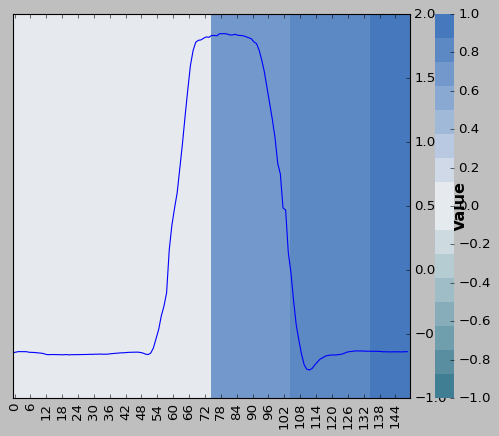

In [13]:
%matplotlib inline
leftist.plot(np.array([explained_instance]).reshape(1,-1,1), np.array([explanations[0]]))